<a href="https://colab.research.google.com/github/tranvangaohd1994/STP_2021_2/blob/LinhDK/DeepLearning/mnist_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1. Thêm các thư viện cần thiết
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist

In [ ]:
# 2. Load dữ liệu MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_val, y_val = X_train[50000:60000,:], y_train[50000:60000]
X_train, y_train = X_train[:50000,:], y_train[:50000]
print(X_train.shape)

(50000, 28, 28)


In [ ]:
# tensor 4 chiều (N, W, H, D), trong bài này là ảnh xám nên W = H = 28, D = 1, N là số lượng ảnh cho mỗi lần training
# 3. Reshape lại dữ liệu cho đúng kích thước mà keras yêu cầu W, H, D
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_val = X_val.reshape(X_val.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [ ]:
# chuyển đổi 5 thành vector [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.] để classify bằng hàm softmax 
# 4. One hot encoding label (Y)
Y_train = np_utils.to_categorical(y_train, 10)
Y_val = np_utils.to_categorical(y_val, 10)
Y_test = np_utils.to_categorical(y_test, 10)
print('Dữ liệu y ban đầu ', y_train[0])
print('Dữ liệu y sau one-hot encoding ',Y_train[0])

Dữ liệu y ban đầu  5
Dữ liệu y sau one-hot encoding  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
# 5. Định nghĩa model
model = Sequential()
 
# Thêm Convolutional layer với 32 kernel, kích thước kernel 3*3
# dùng hàm sigmoid làm activation và chỉ rõ input_shape cho layer đầu tiên
model.add(Conv2D(32, (3, 3), activation='sigmoid', input_shape=(28,28,1)))

# Thêm Convolutional layer
model.add(Conv2D(32, (3, 3), activation='sigmoid'))

# Thêm Max pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

# Flatten layer chuyển từ tensor sang vector
model.add(Flatten())

# Thêm Fully Connected layer với 128 nodes và dùng hàm sigmoid
model.add(Dense(128, activation='sigmoid'))

# Output layer với 10 node và dùng softmax function để chuyển sang xác xuất.
model.add(Dense(10, activation='softmax'))

In [ ]:
# 6. Compile model, chỉ rõ hàm loss_function nào được sử dụng, phương thức 
# đùng để tối ưu hàm loss function.
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
# 7. Thực hiện train model với data
H = model.fit(X_train, Y_train, validation_data=(X_val, Y_val),
          batch_size=32, epochs=10, verbose=1)

Epoch 1/10
1563/1563 [==============================] - 45s 8ms/step - loss: 0.3064 - accuracy: 0.9176 - val_loss: 0.0727 - val_accuracy: 0.9808
Epoch 2/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.0587 - accuracy: 0.9828 - val_loss: 0.0526 - val_accuracy: 0.9855
Epoch 3/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.0368 - accuracy: 0.9896 - val_loss: 0.0468 - val_accuracy: 0.9873
Epoch 4/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.0250 - accuracy: 0.9924 - val_loss: 0.0410 - val_accuracy: 0.9880
Epoch 5/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.0167 - accuracy: 0.9954 - val_loss: 0.0389 - val_accuracy: 0.9885
Epoch 6/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.0112 - accuracy: 0.9971 - val_loss: 0.0402 - val_accuracy: 0.9880
Epoch 7/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.0079 - accuracy: 0.9981 - val_loss: 0.0404 - val_ac

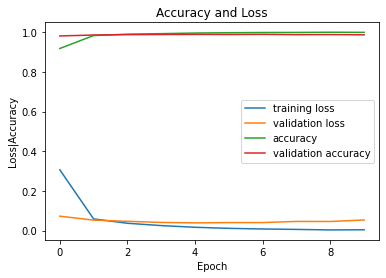

In [ ]:
# 8. Vẽ đồ thị loss, accuracy của traning set và validation set
fig = plt.figure()
numOfEpoch = 10
plt.plot(np.arange(0, numOfEpoch), H.history['loss'], label='training loss')
plt.plot(np.arange(0, numOfEpoch), H.history['val_loss'], label='validation loss')
plt.plot(np.arange(0, numOfEpoch), H.history['accuracy'], label='accuracy')
plt.plot(np.arange(0, numOfEpoch), H.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy and Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss|Accuracy')
plt.legend()

In [ ]:
# 9. Đánh giá model với dữ liệu test set
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.040704190731048584, 0.9894999861717224]


Giá trị dự đoán:  7


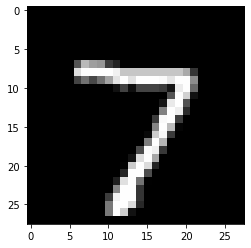

In [ ]:

# 10. Dự đoán ảnh

plt.imshow(X_test[0].reshape(28,28), cmap='gray')

y_predict = model.predict(X_test[0].reshape(1,28,28,1))
print('Giá trị dự đoán: ', np.argmax(y_predict))